Генерируем модель глайдера  

In [50]:
import aerosandbox as asb
import aerosandbox.numpy as np

wing_airfoil = asb.Airfoil("sd7037")
tail_airfoil = asb.Airfoil("naca0010")

airplane = asb.Airplane(
    name="Peter's Glider",
    xyz_ref=[0, 0, 0],  # CG location
    wings=[
        asb.Wing(
            name="Main Wing",
            symmetric=True,
            xsecs=[  
                asb.WingXSec(  
                    xyz_le=[0, 0, 0],  
                    chord=0.18,
                    twist=-5,  
                    airfoil=wing_airfoil,  
                ),
                asb.WingXSec( 
                    xyz_le=[0.08, 1, 0.1],
                    chord=0.08,
                    twist=-5,
                    airfoil=wing_airfoil,
                ),
            ]
        ),
        asb.Wing(
            name="Horizontal Stabilizer",
            symmetric=True,
            xsecs=[
                asb.WingXSec(  
                    xyz_le=[0, 0, 0],
                    chord=0.1,
                    twist=-10,
                    airfoil=tail_airfoil,
                ),
                asb.WingXSec(  
                    xyz_le=[0.02, 0.17, 0],
                    chord=0.08,
                    twist=-10,
                    airfoil=tail_airfoil
                )
            ]
        ).translate([0.6, 0, 0.06]),
        asb.Wing(
            name="Vertical Stabilizer",
            symmetric=False,
            xsecs=[
                asb.WingXSec(
                    xyz_le=[0, 0, 0],
                    chord=0.1,
                    twist=0,
                    airfoil=tail_airfoil,
                ),
                asb.WingXSec(
                    xyz_le=[0.04, 0, 0.15],
                    chord=0.06,
                    twist=0,
                    airfoil=tail_airfoil
                )
            ]
        ).translate([0.6, 0, 0.07])
    ],
    fuselages=[
        asb.Fuselage(
            name="Fuselage",
            xsecs=[
                asb.FuselageXSec(
                    xyz_c=[0.8 * xi - 0.1, 0, 0.1 * xi - 0.03],
                    radius=0.6 * asb.Airfoil("dae51").local_thickness(x_over_c=xi)
                )
                for xi in np.cosspace(0, 1, 30)
            ]
        )
    ]
)
print("Model successfully created")


Model successfully created


Отрисовываем модель глайдера

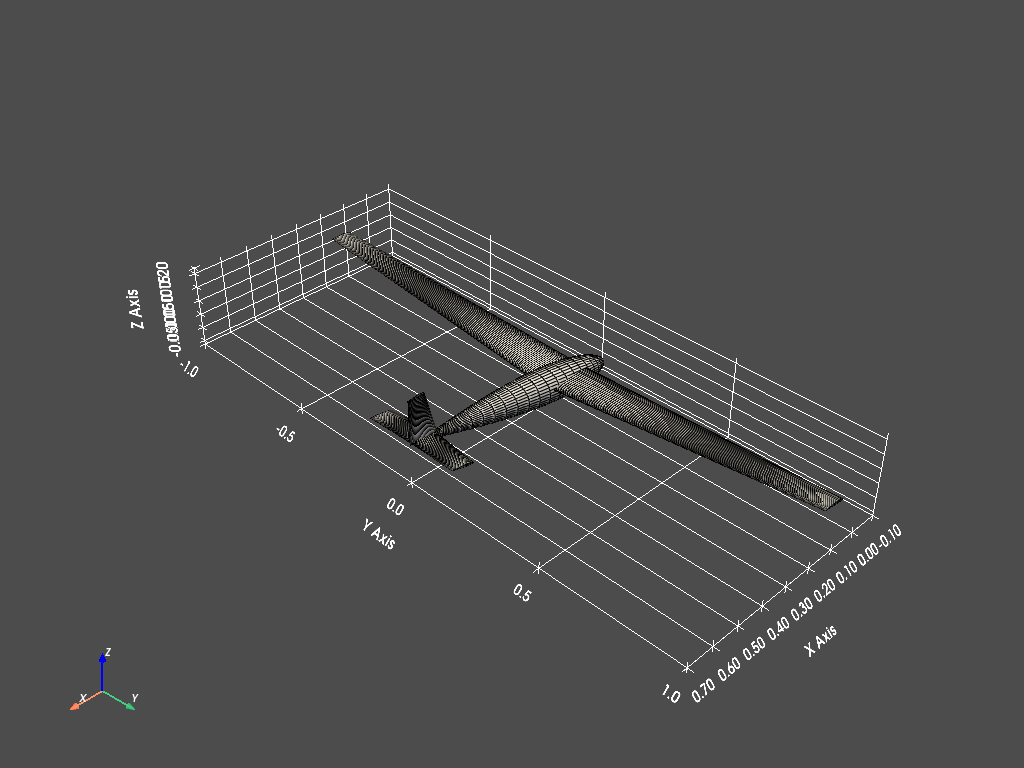

PolyData,Information
N Cells,1769
N Points,1810
N Strips,0
X Bounds,"-1.000e-01, 7.000e-01"
Y Bounds,"-1.000e+00, 1.000e+00"
Z Bounds,"-6.397e-02, 2.200e-01"
N Arrays,0


In [51]:
airplane.draw(show_kwargs=dict(jupyter_backend = "static"))

Создаем поток воздуха

In [52]:
vlm = asb.VortexLatticeMethod(
    airplane=airplane,
    op_point=asb.OperatingPoint(
        velocity=25,  
        alpha=5,  
    )
)
aero = vlm.run() 

Отрисовываем поток на диаграмме

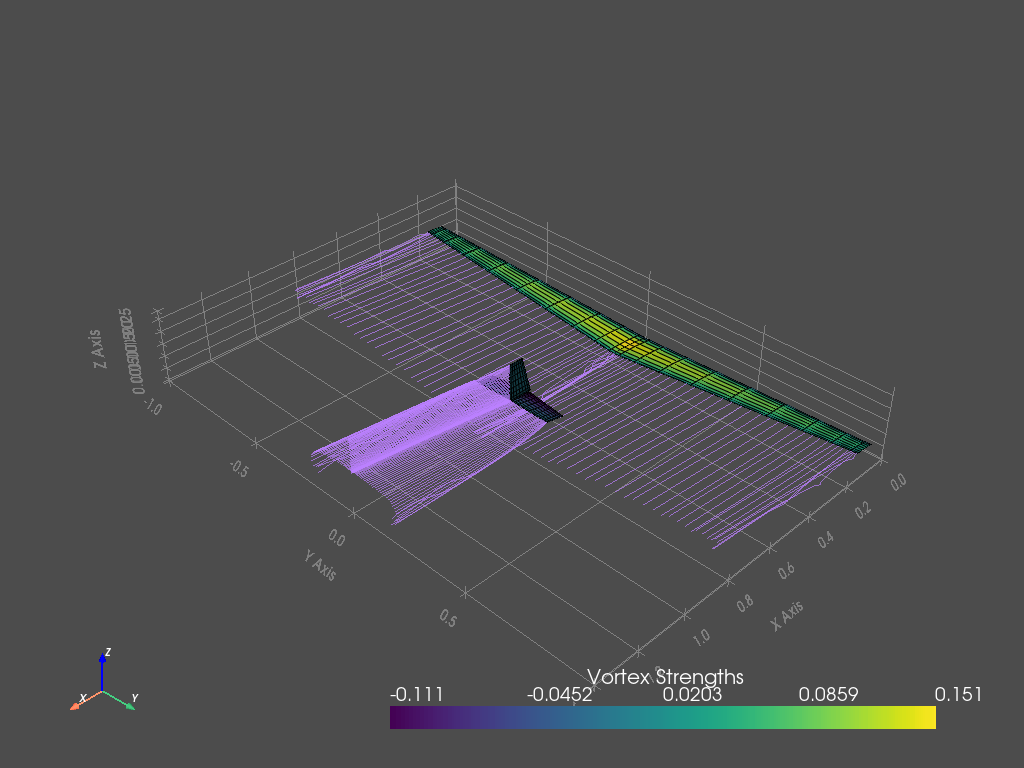

In [53]:
vlm.draw(show_kwargs=dict(jupyter_backend="static"))